In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Salvar a conta com o canal correto
QiskitRuntimeService.save_account(
    token="75acdb50864742fffa775206d23d065002dab431ae93e543315b268b2e9186d4a307e7ec1f24ef943ec2d1c234b33227e939aff93393d7272b1ea780573d43de",
    channel="ibm_quantum",
    overwrite=True
)


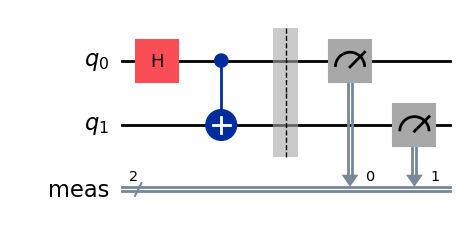

In [15]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.measure_all()

qc.draw("mpl")

In [17]:
from qiskit_algorithms import TrotterQRTE
from qiskit_algorithms.time_evolvers import TimeEvolutionProblem
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit

# Definir o Hamiltoniano H = Z_0 Z_1 + X_0
hamiltonian = SparsePauliOp.from_list([("ZZ", [0, 1], 1.0), ("X", [0], 0.5)])

# Estado inicial |ψ(0)⟩ = |00⟩
initial_state = QuantumCircuit(2)  # Circuito com 2 qubits no estado |00>

# Definir o problema de evolução (H, estado inicial, tempo total de evolução)
problem = TimeEvolutionProblem(
    hamiltonian=hamiltonian,
    initial_state=initial_state,
    time=1.0  # Tempo total de evolução
)

# Criar o evolutor Trotterizado
trotter = TrotterQRTE()

# Realizar a evolução
result = trotter.evolve(problem)

# Mostrar o estado final
print("Estado final:", result.evolved_state)

TypeError: must be real number, not list

In [2]:
from qiskit_algorithms import TrotterQRTE
from qiskit_algorithms.time_evolvers import TimeEvolutionProblem
from qiskit.quantum_info import SparsePauliOp, Statevector


# Definir o Hamiltoniano H = Z_0 Z_1 + X_0
hamiltonian = SparsePauliOp.from_list([("ZZ", [0, 1], 1.0), ("X", [0], 0.5)])

# Estado inicial |ψ(0)⟩ = |00⟩
initial_state = Statevector.from_dict({"00": 1.0})

# Definir o problema de evolução (H, estado inicial, tempo total de evolução)
problem = TimeEvolutionProblem(
    hamiltonian=hamiltonian,
    initial_state=initial_state,
    time=1.0  # Tempo total de evolução
)

# Criar o evolutor Trotterizado
trotter = TrotterQRTE()

# Realizar a evolução
result = trotter.evolve(problem)

# Mostrar o estado final
print("Estado final:", result.evolved_state)


TypeError: must be real number, not list